We need to import the necessary libraries to perform merging and visualization

In [1]:
# we need pandas and numpy to deal with the dataframes
import pandas as pd
import numpy as np
# we need seaborn for visualizations
import seaborn as sns

We are going to be considering 3 data files for this example

1. First Data set contains monthly mobile usage statistics for different users
2. The second data set contains the device information of each and every user
3. The third database is a android device list                           

We are looking at these datasets because we are trying to conclude if there is any relationship between the usage of a user and the type of device used by him/her.

In [2]:
# importing the 3 datasets
usage = pd.read_csv("user_usage.csv")
device = pd.read_csv("user_device.csv")
device_list = pd.read_csv("android_devices.csv")

Having a look at the first few records of each of the datasets

In [3]:
usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [4]:
device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [5]:
device_list.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


Upon having an initial look at the heads of the three tables it is apparent that-

the first and the second table share a uniquely identifying column which can be used to merge these 2 tables - "use_id"
the second and the third table share a uniquely identifying column which can be used to merge them - "device"

Now, in order to merge these datasets we need to ensure that there are no null values in these columns
To get rid of this problem we need to perform some data cleaning by simply dropping the rows with null values.

In [6]:
# we can use the inbuilt function dropna to get rid of null values
usage.dropna(axis = 0, inplace = True)
device.dropna(axis = 0, inplace = True)
device_list.dropna(axis = 0, inplace = True)

Lets merge the first 2 data sets based on the use_id column

In [7]:
usage_with_device = pd.merge(usage, device[['use_id', 'platform', 'device']], on = 'use_id')

In [8]:
# Having a look at the merged dataset
usage_with_device.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


By simply glancing at this new dataframe we should be able to see 3 things we can plot

We know what platform is a categorical variable (android or apple)                                          
We know that outgoing mins, outgoing sms and monthly mb are numerical data

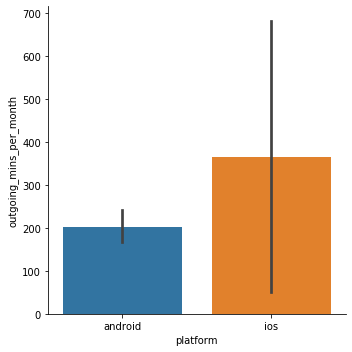

In [9]:
#plotting outgoing minutes per month versus platform
sns.catplot(data = usage_with_device, x = 'platform', y = 'outgoing_mins_per_month', kind = 'bar')

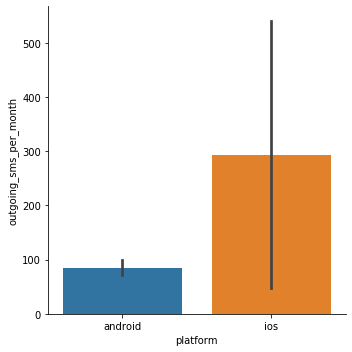

In [10]:
#plotting outgoing sms per month versus platform
sns.catplot(data = usage_with_device, x = 'platform', y = 'outgoing_sms_per_month', kind = 'bar')

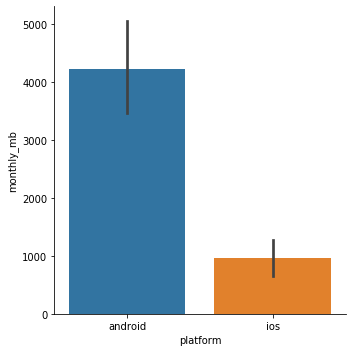

In [11]:
#plotting data used per month versus platform
sns.catplot(data = usage_with_device, x = 'platform', y = 'monthly_mb', kind = 'bar')

From the 3 charts above we can see that ios users have more calls and sms usage per month but less data usage per month.        
The error range(the black line on the top center of the bars) on the ios bars tells us that there is a lot of variation in the usage data of the ios users. So it won't be a great way to compute the average and compare the 2 categories.

From the above three plots we can infer that...

Now lets merge the final dataset into our previously merged dataset

Before we merge we need to look at the data type of the column which contains the overlaping data. In this case we can see that it is text type data.                                              
In such cases to ensure that we get a proper join without loosing any data, it is a good idea to convert that column in upper/lower case.

In [12]:
# Using a lambda function to convert the device model column to uppercase 
usage_with_device['device'].apply(lambda x:x.upper())

0                    GT-I9505
1                    SM-G930F
2                    SM-G930F
3                       D2303
4                    SM-G361F
                ...          
154                  SM-G900F
155                  SM-G900F
156                MOTO G (4)
157                  SM-G900F
158    VODAFONE SMART ULTRA 6
Name: device, Length: 159, dtype: object

In [13]:
# Using a lambda function to convert the device model column to uppercase
device_list['Device'].apply(lambda x:x.upper())

4            OC1020A
5              IN265
6         TR10CS1_11
7             BOOST2
8           AG_FLAIR
            ...     
14541    PNDPP44QC10
14542     PNDPP44QC7
14543          QPI-1
14544       OMNISONE
14545          EASY1
Name: Device, Length: 13375, dtype: object

In [14]:
# Now we are ready to merge. We only have device information about andriod devices so we need to merge using a left merge
# such that we include all the records for which we have the device information.

usage_device_details = pd.merge(usage_with_device, device_list[['Retail Branding', 'Model']], 
                                left_on = 'device', right_on = 'Model', how = 'left')

In [15]:
# having a look at the first few rows of the final dataset
usage_device_details.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Retail Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


Now we can conduct analysis using the Retail Branding column as well. We are going to plot the same three parameters for different smart phone brands

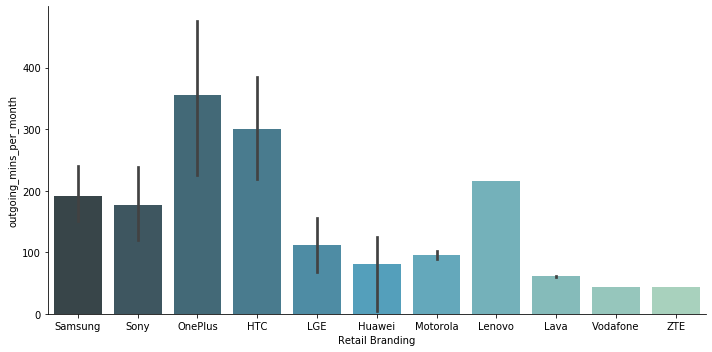

In [16]:
# Plotting outgoing minutes per month for different device brands
sns.catplot(data = usage_device_details, x = 'Retail Branding', y = 'outgoing_mins_per_month', kind = 'bar', 
# Plotting outgoing minutes per month for different device brands            aspect = 2, palette = "GnBu_d")

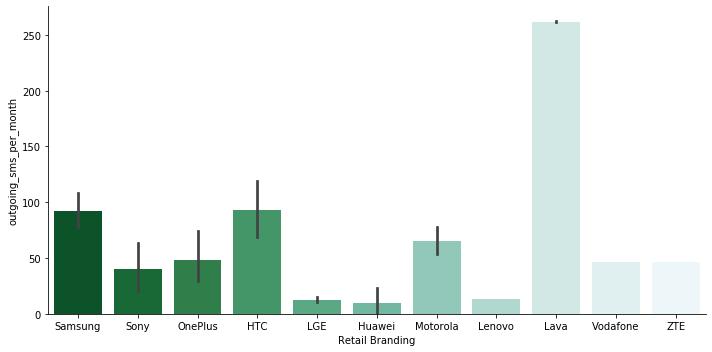

In [17]:
# Plotting outgoing sms per month for different device brands
sns.catplot(data = usage_device_details, x = 'Retail Branding', y = 'outgoing_sms_per_month', kind = 'bar', 
            aspect = 2, palette = "BuGn_r")

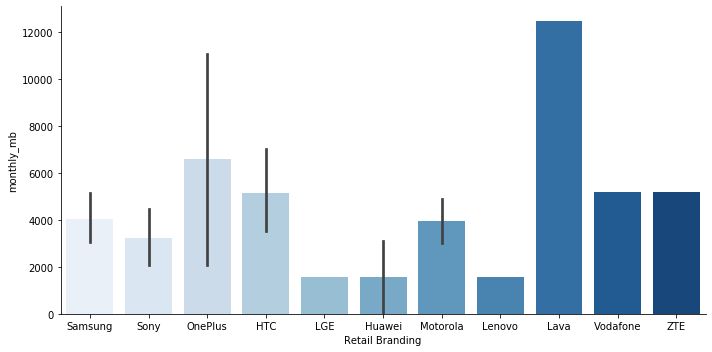

In [18]:
# Plotting data used per month for different device brands
sns.catplot(data = usage_device_details, x = 'Retail Branding', y = 'monthly_mb', kind = 'bar', 
            aspect = 2, palette = "Blues")

It is important to note that the color gradient is not representing any data parameter. We just use a color scheme to avoid charts having rainbow themed colors (which makes the charts a lot more busy).

From the above 3 charts we can tell that - 

Outgoing mins per month are distributed uniformly for all the brands except for OnePlus branded phones
Outgoing sms per month and data usage are distributed uniformly for most of the brands except for Lava branded phones